In [1]:
#Breast Cancer : simple machine learning script

In [2]:
#importing the libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd#importing our cancer dataset
dataset = pd.read_csv("breast_cancer_bd.csv")

dataset.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
os. getcwd()

'C:\\Users\\rchaz'

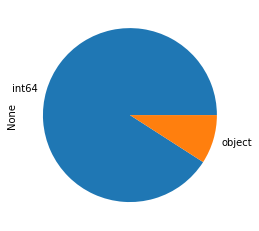

In [4]:
#types de variables
##pourcentage de valeurs en fonction de chaque type d'objets et de valeurs manquantes
dataset.dtypes.value_counts().plot.pie();

In [5]:
#nombre et type des variables

dataset.dtypes.value_counts()

int64     10
object     1
dtype: int64

In [6]:
#répartition de X et Y
X = dataset.iloc[:, 1:-1]
Y = dataset.iloc[:, -1]

In [7]:
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [8]:
Y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

In [9]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [10]:
#shape
dataset.shape

(699, 11)

In [11]:
#699 individus, 10 variables, 11 cible (class). On va pouvoir prédire.

In [12]:
#les nuls et les nans 
dataset.isnull().sum()
dataset.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [13]:
#traquons les valeurs infinies
# Recherchez les valeurs infinies dans le DataFrame
infinite_values = dataset.isin([np.inf, -np.inf]).any()

# Affichez les colonnes contenant des valeurs infinies
print(infinite_values)

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool


In [14]:
#acune null et aucune nan, et aucune valeur infinie

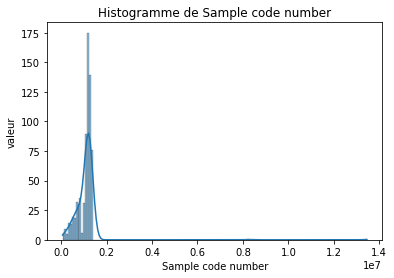

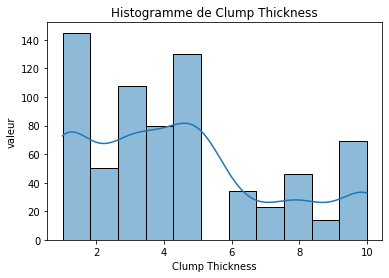

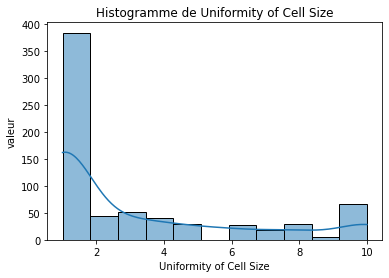

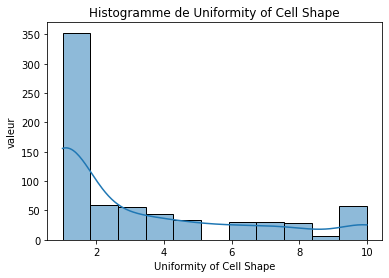

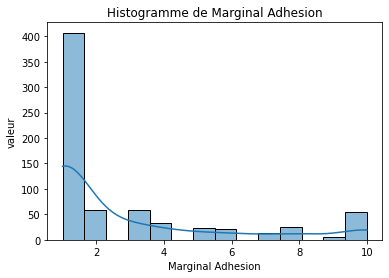

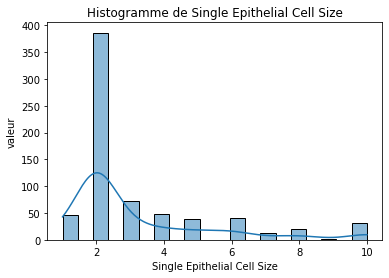

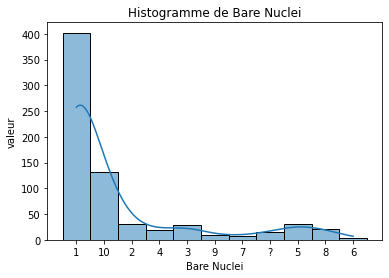

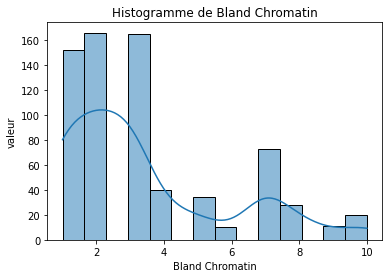

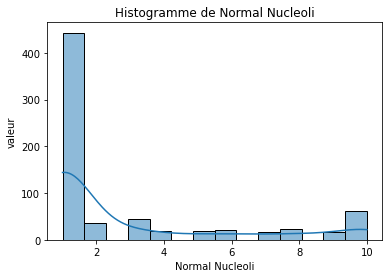

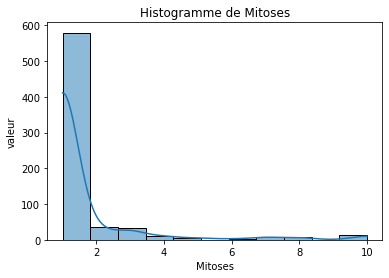

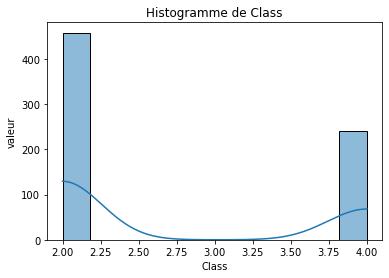

In [15]:
#analyse de la distribution des variables
import seaborn as sns

# Parcours de chaque colonne du DataFrame
for column in dataset.columns:
    # Créez un histogramme pour la variable
    sns.histplot(dataset[column], kde=True)  # Utilisez kde=True pour ajouter une estimation de la densité
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('valeur')
    plt.show()  # Affichez l'histogramme


Class                          100.000000
Uniformity of Cell Shape        81.893374
Uniformity of Cell Size         81.790374
Bland Chromatin                 75.661615
Clump Thickness                 71.600136
Normal Nucleoli                 71.224362
Marginal Adhesion               69.680021
Single Epithelial Cell Size     68.278453
Mitoses                         42.317026
Sample code number               8.022565
Name: Class, dtype: float64


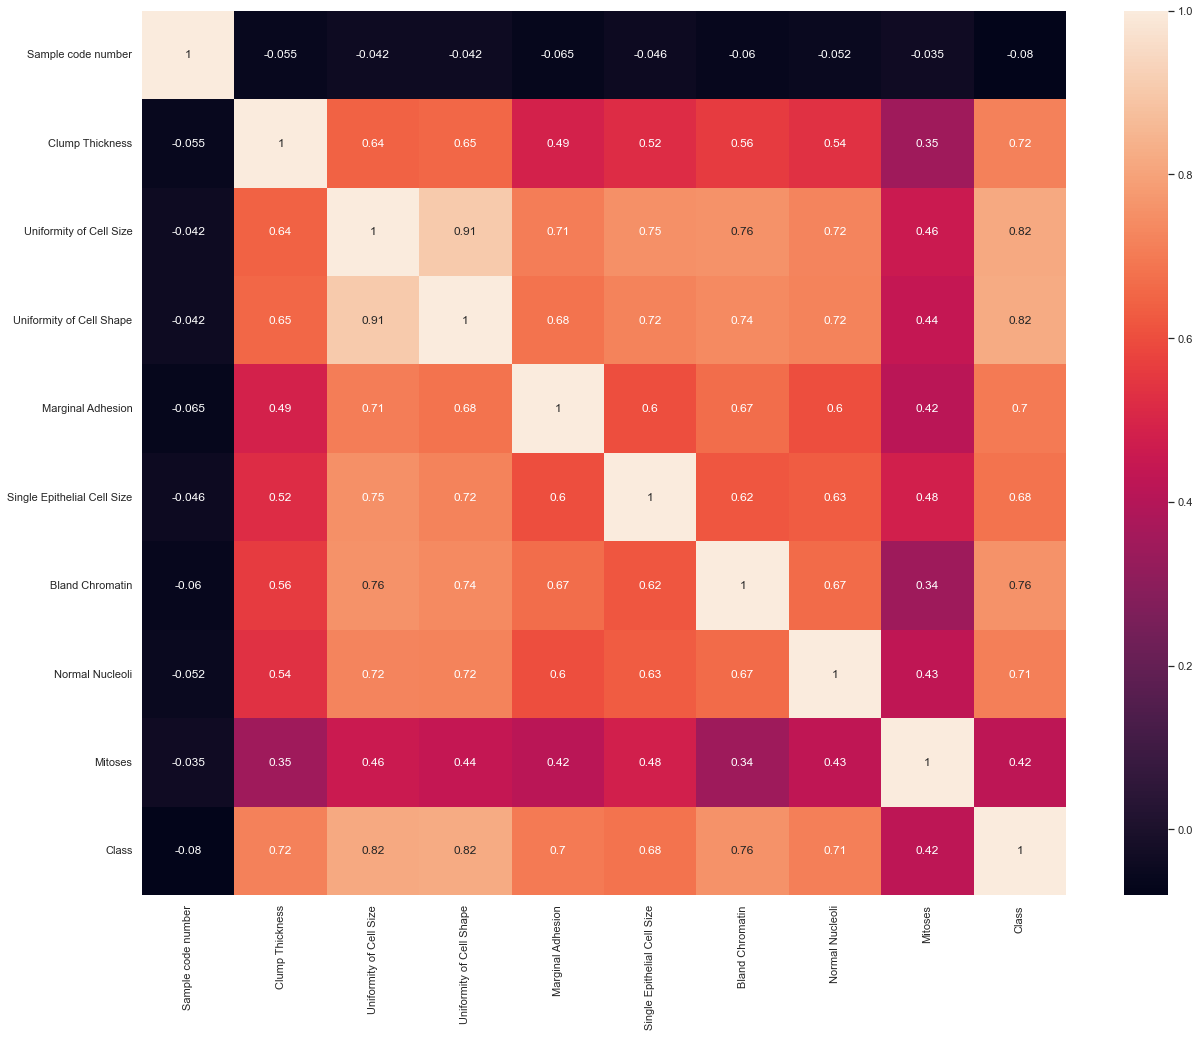

In [58]:
#matrice de corrélation

#matrice de corrélation en "heatmap" :
Var_Corr = dataset.corr()
sns.set(rc={'figure.figsize':(20.7,16.27)})
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

#Affichage en valeur absolue pour filtrer les variables < 5% par ordre d'importance de
#corrélation (positive ou négative) à la variable cible.
print(100*abs(Var_Corr['Class']).sort_values(ascending = False))

In [ ]:
#on voirt que mitose est faiblement corrélée avec toutes les autres variables ainsi que la cible.
#pour le moment nous allons garder cette variable.

In [16]:
#beaucoup de variables semblent etre distribuées selon deux modes, ce qui correspond à la distribution de la cible : 2 ou 4.
#si on se fie aux variables mitose, uniformity, adhereance, size, la classe 2 est la classe cancérigène, 
# la classe 4 est la classe normale.

In [17]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [18]:
Y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

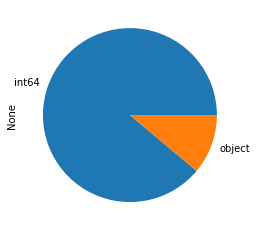

In [19]:
#types de variables
##pourcentage de valeurs en fonction de chaque type d'objets et de valeurs manquantes
X.dtypes.value_counts().plot.pie();

In [20]:
X.dtypes

Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
dtype: object

In [21]:
#X['Bare Nuclei'] = X['Bare Nuclei'].astype(str).astype(int)

#toutes les tentatives pour convertir bate Nuclei column échouent. Je vais la virer.
X = X.drop(['Bare Nuclei'], axis=1)

In [22]:
#nombre et type des variables

X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,3,3,7,1
4,4,1,1,3,2,3,1,1


In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [24]:
#nombre et type des variables
X_train_df = pd.DataFrame(X_train)
X_train_df.dtypes.value_counts()

int64    8
dtype: int64

In [25]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
### ML
#nous testerons plusieurs algos de classification, et retriendrons le meilleur

In [27]:
#Using Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#vu que nous allons utiliser des algos avec des hyperparamètres différents, 
# nous ne pouvons pas systématiser sous la forme d'une boucle

#fit
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

#predire
Y_pred_train_logreg = classifier.predict(X_train)
Y_pred_test_logreg = classifier.predict(X_test)


#obtenir l'accuracy
acc_train_logreg = accuracy_score(Y_train, Y_pred_train_logreg)
acc_test_logreg = accuracy_score(Y_test, Y_pred_test_logreg)

#obtenir le F1 score
f1score_train_logreg = f1_score(Y_train, Y_pred_train_logreg, average='macro')
f1score_test_logreg = f1_score(Y_test, Y_pred_test_logreg, average='macro')

#afficher l'accuracy et F1 score
print("acc_train : ", acc_train_logreg, "acc_test :", acc_test_logreg)
print("F1score_train : ", f1score_train_logreg, "F1score_test : ", f1score_test_logreg)

#Afficher une matrice de confusion pour comparer les classes réelles et prédites.
#pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

#matrice de confusion
print(pd.crosstab(Y_test, Y_pred_test_logreg, rownames=['Classe réelle'], colnames=['Classe prédite']))




acc_train :  0.9618320610687023 acc_test : 0.9428571428571428
F1score_train :  0.9575742854829569 F1score_test :  0.937553525549529
Classe prédite    0   1
Classe réelle          
0               108   4
1                 6  57


In [28]:
#Using KNN classification
from sklearn.neighbors import KNeighborsClassifier


#vu que nous allons utiliser des algos avec des hyperparamètres différents, 
# nous ne pouvons pas systématiser sous la forme d'une boucle

#fit
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

#predire
Y_pred_train_KNN = classifier.predict(X_train)
Y_pred_test_KNN = classifier.predict(X_test)


#obtenir l'accuracy
acc_train_KNN = accuracy_score(Y_train, Y_pred_train_KNN)
acc_test_KNN = accuracy_score(Y_test, Y_pred_test_KNN)

#obtenir le F1 score
f1score_train_KNN = f1_score(Y_train, Y_pred_train_KNN, average='macro')
f1score_test_KNN = f1_score(Y_test, Y_pred_test_KNN, average='macro')

#afficher l'accuracy et F1 score
print("acc_train : ", acc_train_KNN, "acc_test :", acc_test_KNN)
print("F1score_train : ", f1score_train_KNN, "F1score_test : ", f1score_test_KNN)

#Afficher une matrice de confusion pour comparer les classes réelles et prédites.
#pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

#matrice de confusion
print(pd.crosstab(Y_test, Y_pred_test_KNN, rownames=['Classe réelle'], colnames=['Classe prédite']))




acc_train :  0.9713740458015268 acc_test : 0.9428571428571428
F1score_train :  0.9683899378657175 F1score_test :  0.9379960317460317
Classe prédite    0   1
Classe réelle          
0               107   5
1                 5  58


In [29]:
#Using SVC Algorithm 
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

#predire
Y_pred_train_SVC = classifier.predict(X_train)
Y_pred_test_SVC = classifier.predict(X_test)


#obtenir l'accuracy
acc_train_SVC = accuracy_score(Y_train, Y_pred_train_SVC)
acc_test_SVC = accuracy_score(Y_test, Y_pred_test_SVC)

#obtenir le F1 score
f1score_train_SVC = f1_score(Y_train, Y_pred_train_SVC, average='macro')
f1score_test_SVC = f1_score(Y_test, Y_pred_test_SVC, average='macro')

#afficher l'accuracy et F1 score
print("acc_train : ", acc_train_SVC, "acc_test :", acc_test_SVC)
print("F1score_train : ", f1score_train_SVC, "F1score_test : ", f1score_test_SVC)

#Afficher une matrice de confusion pour comparer les classes réelles et prédites.
#pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

#matrice de confusion
print(pd.crosstab(Y_test, Y_pred_test_SVC, rownames=['Classe réelle'], colnames=['Classe prédite']))



acc_train :  0.9599236641221374 acc_test : 0.9542857142857143
F1score_train :  0.9555126116328618 F1score_test :  0.9503968253968254
Classe prédite    0   1
Classe réelle          
0               108   4
1                 4  59


In [30]:
#Using SVC rbf kernel
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

#predire
Y_pred_train_SVCrbf = classifier.predict(X_train)
Y_pred_test_SVCrbf = classifier.predict(X_test)


#obtenir l'accuracy
acc_train_SVCrbf = accuracy_score(Y_train, Y_pred_train_SVCrbf)
acc_test_SVCrbf = accuracy_score(Y_test, Y_pred_test_SVCrbf)

#obtenir le F1 score
f1score_train_SVCrbf = f1_score(Y_train, Y_pred_train_SVCrbf, average='macro')
f1score_test_SVCrbf = f1_score(Y_test, Y_pred_test_SVCrbf, average='macro')

#afficher l'accuracy et F1 score
print("acc_train : ", acc_train_SVCrbf, "acc_test :", acc_test_SVCrbf)
print("F1score_train : ", f1score_train_SVCrbf, "F1score_test : ", f1score_test_SVCrbf)

#Afficher une matrice de confusion pour comparer les classes réelles et prédites.
#pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

#matrice de confusion
print(pd.crosstab(Y_test, Y_pred_test_SVCrbf, rownames=['Classe réelle'], colnames=['Classe prédite']))



acc_train :  0.9675572519083969 acc_test : 0.96
F1score_train :  0.9641752629144799 F1score_test :  0.9567458776173158
Classe prédite    0   1
Classe réelle          
0               108   4
1                 3  60


In [31]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

#predire
Y_pred_train_gauss = classifier.predict(X_train)
Y_pred_test_gauss = classifier.predict(X_test)


#obtenir l'accuracy
acc_train_gauss = accuracy_score(Y_train, Y_pred_train_gauss)
acc_test_gauss = accuracy_score(Y_test, Y_pred_test_gauss)

#obtenir le F1 score
f1score_train_gauss = f1_score(Y_train, Y_pred_train_gauss, average='macro')
f1score_test_gauss = f1_score(Y_test, Y_pred_test_gauss, average='macro')

#afficher l'accuracy et F1 score
print("acc_train : ", acc_train_gauss, "acc_test :", acc_test_gauss)
print("F1score_train : ", f1score_train_gauss, "F1score_test : ", f1score_test_gauss)

#Afficher une matrice de confusion pour comparer les classes réelles et prédites.
#pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

#matrice de confusion
print(pd.crosstab(Y_test, Y_pred_test_gauss, rownames=['Classe réelle'], colnames=['Classe prédite']))



acc_train :  0.9599236641221374 acc_test : 0.9428571428571428
F1score_train :  0.9559711435739235 F1score_test :  0.9384149774774774
Classe prédite    0   1
Classe réelle          
0               106   6
1                 4  59


In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

#predire
Y_pred_train_tree = classifier.predict(X_train)
Y_pred_test_tree = classifier.predict(X_test)


#obtenir l'accuracy
acc_train_tree = accuracy_score(Y_train, Y_pred_train_tree)
acc_test_tree = accuracy_score(Y_test, Y_pred_test_tree)

#obtenir le F1 score
f1score_train_tree = f1_score(Y_train, Y_pred_train_tree, average='macro')
f1score_test_tree = f1_score(Y_test, Y_pred_test_tree, average='macro')

#afficher l'accuracy et F1 score
print("acc_train : ", acc_train_tree, "acc_test :", acc_test_tree)
print("F1score_train : ", f1score_train_tree, "F1score_test : ", f1score_test_tree)

#Afficher une matrice de confusion pour comparer les classes réelles et prédites.
#pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

#matrice de confusion
print(pd.crosstab(Y_test, Y_pred_test_tree, rownames=['Classe réelle'], colnames=['Classe prédite']))



acc_train :  1.0 acc_test : 0.9028571428571428
F1score_train :  1.0 F1score_test :  0.8942222222222223
Classe prédite    0   1
Classe réelle          
0               104   8
1                 9  54


In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

#predire
Y_pred_train_RF = classifier.predict(X_train)
Y_pred_test_RF = classifier.predict(X_test)


#obtenir l'accuracy
acc_train_RF = accuracy_score(Y_train, Y_pred_train_RF)
acc_test_RF = accuracy_score(Y_test, Y_pred_test_RF)

#obtenir le F1 score
f1score_train_RF = f1_score(Y_train, Y_pred_train_RF, average='macro')
f1score_test_RF = f1_score(Y_test, Y_pred_test_RF, average='macro')

#afficher l'accuracy et F1 score
print("acc_train : ", acc_train_RF, "acc_test :", acc_test_RF)
print("F1score_train : ", f1score_train_RF, "F1score_test : ", f1score_test_RF)

#Afficher une matrice de confusion pour comparer les classes réelles et prédites.
#pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

#matrice de confusion
print(pd.crosstab(Y_test, Y_pred_test_RF, rownames=['Classe réelle'], colnames=['Classe prédite']))


acc_train :  1.0 acc_test : 0.9542857142857143
F1score_train :  1.0 F1score_test :  0.9500428204396231
Classe prédite    0   1
Classe réelle          
0               109   3
1                 5  58


In [34]:
#analysons ces premiers résultats.
print("logreg results")
print("acc_train : ", acc_train_logreg, "acc_test :", acc_test_logreg)
print("F1score_train : ", f1score_train_logreg, "F1score_test : ", f1score_test_logreg)
print(pd.crosstab(Y_test, Y_pred_test_logreg, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(" ")
print("KNN results")
print("acc_train : ", acc_train_KNN, "acc_test :", acc_test_KNN)
print("F1score_train : ", f1score_train_KNN, "F1score_test : ", f1score_test_KNN)
print(pd.crosstab(Y_test, Y_pred_test_KNN, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(" ")
print("SVC results")
print("acc_train : ", acc_train_SVC, "acc_test :", acc_test_SVC)
print("F1score_train : ", f1score_train_SVC, "F1score_test : ", f1score_test_SVC)
print(pd.crosstab(Y_test, Y_pred_test_SVC, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(" ")
print("SVC kernel results")
print("acc_train : ", acc_train_SVCrbf, "acc_test :", acc_test_SVCrbf)
print("F1score_train : ", f1score_train_SVCrbf, "F1score_test : ", f1score_test_SVCrbf)
print(pd.crosstab(Y_test, Y_pred_test_SVCrbf, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(" ")
print("naive bayes results")
print("acc_train : ", acc_train_gauss, "acc_test :", acc_test_gauss)
print("F1score_train : ", f1score_train_gauss, "F1score_test : ", f1score_test_gauss)
print(pd.crosstab(Y_test, Y_pred_test_gauss, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(" ")
print("decision tree results")
print("acc_train : ", acc_train_tree, "acc_test :", acc_test_tree)
print("F1score_train : ", f1score_train_tree, "F1score_test : ", f1score_test_tree)
print(pd.crosstab(Y_test, Y_pred_test_tree, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(" ")
print("random forest tree results")
print("acc_train : ", acc_train_RF, "acc_test :", acc_test_RF)
print("F1score_train : ", f1score_train_RF, "F1score_test : ", f1score_test_RF)
print(pd.crosstab(Y_test, Y_pred_test_RF, rownames=['Classe réelle'], colnames=['Classe prédite']))

logreg results
acc_train :  0.9618320610687023 acc_test : 0.9428571428571428
F1score_train :  0.9575742854829569 F1score_test :  0.937553525549529
Classe prédite    0   1
Classe réelle          
0               108   4
1                 6  57
 
KNN results
acc_train :  0.9713740458015268 acc_test : 0.9428571428571428
F1score_train :  0.9683899378657175 F1score_test :  0.9379960317460317
Classe prédite    0   1
Classe réelle          
0               107   5
1                 5  58
 
SVC results
acc_train :  0.9599236641221374 acc_test : 0.9542857142857143
F1score_train :  0.9555126116328618 F1score_test :  0.9503968253968254
Classe prédite    0   1
Classe réelle          
0               108   4
1                 4  59
 
SVC kernel results
acc_train :  0.9675572519083969 acc_test : 0.96
F1score_train :  0.9641752629144799 F1score_test :  0.9567458776173158
Classe prédite    0   1
Classe réelle          
0               108   4
1                 3  60
 
naive bayes results
acc_train :  

In [41]:
#nous allons garder deux algos : SVC kernel et RF

In [42]:
#cela dit, ces très bonnes peformances peuvent etre dues à un surapprentissage.
#nous allons donc refaire la prédiction, mais avec 5 jeux tirés aléatoirement

In [51]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xsc = sc.fit_transform(X)

#partage des données : 5 seeds
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(Xsc, Y, test_size = 0.25, random_state = 4)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(Xsc, Y, test_size = 0.25, random_state = 8)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(Xsc, Y, test_size = 0.25, random_state = 12)
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(Xsc, Y, test_size = 0.25, random_state = 24)
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(Xsc, Y, test_size = 0.25, random_state = 42)

In [52]:
#Using SVC rbf kernel
#réécriture sous forme de fonction, pas économie d'espace
from statistics import mean 
from statistics import stdev
from sklearn.svm import SVC

accuracy_list_train = []
accuracy_list_test = []
F1_list_train = []
F1_list_test = []

def runSVCkernel(xtrain, ytrain, xtest, ytest):
    
    #entrainer
    classifier = SVC(kernel = 'rbf', random_state = 0)
    classifier.fit(xtrain, ytrain)

    #predire
    Y_pred_train_SVCrbf = classifier.predict(xtrain)
    Y_pred_test_SVCrbf = classifier.predict(xtest)


    #obtenir l'accuracy
    acc_train_SVCrbf = accuracy_score(ytrain, Y_pred_train_SVCrbf)
    acc_test_SVCrbf = accuracy_score(ytest, Y_pred_test_SVCrbf)

    #obtenir le F1 score
    f1score_train_SVCrbf = f1_score(ytrain, Y_pred_train_SVCrbf, average='macro')
    f1score_test_SVCrbf = f1_score(ytest, Y_pred_test_SVCrbf, average='macro')

    #afficher l'accuracy et F1 score
    print("acc_train : ", acc_train_SVCrbf, "acc_test :", acc_test_SVCrbf)
    print("F1score_train : ", f1score_train_SVCrbf, "F1score_test : ", f1score_test_SVCrbf)

    #Afficher une matrice de confusion pour comparer les classes réelles et prédites.
    #matrice de confusion
    print(pd.crosstab(ytest, Y_pred_test_SVCrbf, rownames=['Classe réelle'], colnames=['Classe prédite']))
    
    #enregrister pour calcul moyenne
    accuracy_list_train.append(acc_train_SVCrbf)
    accuracy_list_test.append(acc_test_SVCrbf)
    F1_list_train.append(f1score_train_SVCrbf)
    F1_list_test.append(f1score_test_SVCrbf)
    
    
runSVCkernel(X_train1, Y_train1, X_test1, Y_test1)
runSVCkernel(X_train2, Y_train2, X_test2, Y_test2)
runSVCkernel(X_train3, Y_train3, X_test2, Y_test3)
runSVCkernel(X_train4, Y_train4, X_test2, Y_test4)
runSVCkernel(X_train5, Y_train5, X_test2, Y_test5)


print("accuracy train moyenne = ", mean(accuracy_list_train), " +/-", stdev(accuracy_list_train))
print("accuracy test moyenne = ", mean(accuracy_list_test), " +/-", stdev(accuracy_list_test))
print("f1 train moyenne = ", mean(F1_list_train), " +/-", stdev(F1_list_train))
print("f1 test moyenne = ", mean(F1_list_test), " +/-", stdev(F1_list_test))

acc_train :  0.9637404580152672 acc_test : 0.9657142857142857
F1score_train :  0.9600633787280131 F1score_test :  0.9622519413287317
Classe prédite    0   1
Classe réelle          
0               111   2
1                 4  58
acc_train :  0.9713740458015268 acc_test : 0.9485714285714286
F1score_train :  0.9685508168385168 F1score_test :  0.944
Classe prédite    0   1
Classe réelle          
0               108   7
1                 2  58
acc_train :  0.9656488549618321 acc_test : 0.5428571428571428
F1score_train :  0.9621168305378832 F1score_test :  0.5073198198198198
Classe prédite   0   1
Classe réelle         
0               71  42
1               38  24
acc_train :  0.9618320610687023 acc_test : 0.4857142857142857
F1score_train :  0.9583253801616085 F1score_test :  0.42934782608695654
Classe prédite   0   1
Classe réelle         
0               70  47
1               43  15
acc_train :  0.9675572519083969 acc_test : 0.5542857142857143
F1score_train :  0.9647033184744923 F1scor

In [ ]:
#nous observons une chute des performances en prédiction. Il y avait bien surapprentissage.
#Devons nous considerer qu'une accuracy et un f1 moyens de 0.69 et 0.66 +/- 0.23-0.25 sont acceptables ?
#le nombre cumulé de faux négatifs et faux positifs cumulé est équivalent au nombre de vrais positifs.

#nous pourrions tenter un oversampling afin de compenser la différence de nombre entre classe 1 et 2 
# montrée dans la partie exploration des données.
#nous n'allons pas tenter une sélection de variables ou une réduction de dimension au vu de peu de variables dont nous disposons.

In [53]:
#Using SVC rbf kernel
#réécriture sous forme de fonction, pas économie d'espace
from statistics import mean 
from statistics import stdev
from sklearn.ensemble import RandomForestClassifier

accuracy_list_train = []
accuracy_list_test = []
F1_list_train = []
F1_list_test = []

def runRF(xtrain, ytrain, xtest, ytest):
    
    #entrainer
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(xtrain, ytrain)

    #predire
    Y_pred_train_RF = classifier.predict(xtrain)
    Y_pred_test_RF = classifier.predict(xtest)


    #obtenir l'accuracy
    acc_train_RF = accuracy_score(ytrain, Y_pred_train_RF)
    acc_test_RV = accuracy_score(ytest, Y_pred_test_RF)

    #obtenir le F1 score
    f1score_train_RF = f1_score(ytrain, Y_pred_train_RF, average='macro')
    f1score_test_RF = f1_score(ytest, Y_pred_test_RF, average='macro')

    #afficher l'accuracy et F1 score
    print("acc_train : ", acc_train_RF, "acc_test :", acc_test_RF)
    print("F1score_train : ", f1score_train_RF, "F1score_test : ", f1score_test_RF)

    #Afficher une matrice de confusion pour comparer les classes réelles et prédites.
    #matrice de confusion
    print(pd.crosstab(ytest, Y_pred_test_RF, rownames=['Classe réelle'], colnames=['Classe prédite']))
    
    #enregrister pour calcul moyenne
    accuracy_list_train.append(acc_train_RF)
    accuracy_list_test.append(acc_test_RF)
    F1_list_train.append(f1score_train_RF)
    F1_list_test.append(f1score_test_RF)
    
    
runRF(X_train1, Y_train1, X_test1, Y_test1)
runRF(X_train2, Y_train2, X_test2, Y_test2)
runRF(X_train3, Y_train3, X_test2, Y_test3)
runRF(X_train4, Y_train4, X_test2, Y_test4)
runRF(X_train5, Y_train5, X_test2, Y_test5)


print("accuracy train moyenne = ", mean(accuracy_list_train), " +/-", stdev(accuracy_list_train))
print("accuracy test moyenne = ", mean(accuracy_list_test), " +/-", stdev(accuracy_list_test))
print("f1 train moyenne = ", mean(F1_list_train), " +/-", stdev(F1_list_train))
print("f1 test moyenne = ", mean(F1_list_test), " +/-", stdev(F1_list_test))

acc_train :  0.9980916030534351 acc_test : 0.9542857142857143
F1score_train :  0.9978758507744632 F1score_test :  0.9619565217391304
Classe prédite    0   1
Classe réelle          
0               112   1
1                 5  57
acc_train :  0.9961832061068703 acc_test : 0.9542857142857143
F1score_train :  0.9957798431132516 F1score_test :  0.9492753623188406
Classe prédite    0   1
Classe réelle          
0               111   4
1                 4  56
acc_train :  1.0 acc_test : 0.9542857142857143
F1score_train :  1.0 F1score_test :  0.512917499286326
Classe prédite   0   1
Classe réelle         
0               74  39
1               39  23
acc_train :  0.9961832061068703 acc_test : 0.9542857142857143
F1score_train :  0.995812020460358 F1score_test :  0.4415098492351711
Classe prédite   0   1
Classe réelle         
0               73  44
1               43  15
acc_train :  0.9942748091603053 acc_test : 0.9542857142857143
F1score_train :  0.993725828274483 F1score_test :  0.488603156

In [ ]:
#nous observons une chute des performances du F1 en prédiction, par contre l'accuracy de préduction se maintient.
#je suis très sceptique sur le calcul de l'accuracy de test.
#le nombre cumulé de faux négatifs et faux positifs cumulé est équivalent au nombre de vrais positifs.

#nous pourrions tenter un oversampling afin de compenser la différence de nombre entre classe 1 et 2 
# montrée dans la partie exploration des données.
#nous n'allons pas tenter une sélection de variables ou une réduction de dimension au vu de peu de variables dont nous disposons.

In [54]:
#test avec oversampling smote
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE

smo = SMOTE()
x_sm, y_sm = smo.fit_resample(Xsc, Y)
print('Classes échantillon SMOTE :', dict(pd.Series(y_sm).value_counts()))

#partage des données : 5 seeds
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x_sm, y_sm, test_size = 0.25, random_state = 4)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x_sm, y_sm, test_size = 0.25, random_state = 8)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(x_sm, y_sm, test_size = 0.25, random_state = 12)
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(x_sm, y_sm, test_size = 0.25, random_state = 24)
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(x_sm, y_sm, test_size = 0.25, random_state = 42)

Classes échantillon SMOTE : {0: 458, 1: 458}


In [56]:
#Using SVC rbf kernel
#réécriture sous forme de fonction, pas économie d'espace
from statistics import mean 
from statistics import stdev
from sklearn.svm import SVC

accuracy_list_train = []
accuracy_list_test = []
F1_list_train = []
F1_list_test = []

def runSVCkernel(xtrain, ytrain, xtest, ytest):
    
    #entrainer
    classifier = SVC(kernel = 'rbf', random_state = 0)
    classifier.fit(xtrain, ytrain)

    #predire
    Y_pred_train_SVCrbf = classifier.predict(xtrain)
    Y_pred_test_SVCrbf = classifier.predict(xtest)


    #obtenir l'accuracy
    acc_train_SVCrbf = accuracy_score(ytrain, Y_pred_train_SVCrbf)
    acc_test_SVCrbf = accuracy_score(ytest, Y_pred_test_SVCrbf)

    #obtenir le F1 score
    f1score_train_SVCrbf = f1_score(ytrain, Y_pred_train_SVCrbf, average='macro')
    f1score_test_SVCrbf = f1_score(ytest, Y_pred_test_SVCrbf, average='macro')

    #afficher l'accuracy et F1 score
    print("acc_train : ", acc_train_SVCrbf, "acc_test :", acc_test_SVCrbf)
    print("F1score_train : ", f1score_train_SVCrbf, "F1score_test : ", f1score_test_SVCrbf)

    #Afficher une matrice de confusion pour comparer les classes réelles et prédites.
    #matrice de confusion
    print(pd.crosstab(ytest, Y_pred_test_SVCrbf, rownames=['Classe réelle'], colnames=['Classe prédite']))
    
    #enregrister pour calcul moyenne
    accuracy_list_train.append(acc_train_SVCrbf)
    accuracy_list_test.append(acc_test_SVCrbf)
    F1_list_train.append(f1score_train_SVCrbf)
    F1_list_test.append(f1score_test_SVCrbf)
    
    
runSVCkernel(X_train1, Y_train1, X_test1, Y_test1)
runSVCkernel(X_train2, Y_train2, X_test2, Y_test2)
runSVCkernel(X_train3, Y_train3, X_test2, Y_test3)
runSVCkernel(X_train4, Y_train4, X_test2, Y_test4)
runSVCkernel(X_train5, Y_train5, X_test2, Y_test5)


print("accuracy train moyenne = ", mean(accuracy_list_train), " +/-", stdev(accuracy_list_train))
print("accuracy test moyenne = ", mean(accuracy_list_test), " +/-", stdev(accuracy_list_test))
print("f1 train moyenne = ", mean(F1_list_train), " +/-", stdev(F1_list_train))
print("f1 test moyenne = ", mean(F1_list_test), " +/-", stdev(F1_list_test))

acc_train :  0.9621542940320232 acc_test : 0.982532751091703
F1score_train :  0.9621253244219776 F1score_test :  0.9824762779308234
Classe prédite    0    1
Classe réelle           
0               119    3
1                 1  106
acc_train :  0.9679767103347889 acc_test : 0.9694323144104804
F1score_train :  0.9679570895522389 F1score_test :  0.9691475643320437
Classe prédite    0    1
Classe réelle           
0               100    2
1                 5  122
acc_train :  0.9767103347889374 acc_test : 0.4890829694323144
F1score_train :  0.9767102854430809 F1score_test :  0.4859067099027189
Classe prédite   0   1
Classe réelle         
0               47  63
1               54  65
acc_train :  0.9767103347889374 acc_test : 0.5807860262008734
F1score_train :  0.9766925073366015 F1score_test :  0.5801375095492742
Classe prédite   0   1
Classe réelle         
0               62  58
1               38  71
acc_train :  0.975254730713246 acc_test : 0.4978165938864629
F1score_train :  0.97524

In [ ]:
#on gagne 0.3 sur le f1 et 0.1 sur l'accuracy en prédiction.
#l'oversampling smote n'est pas efficace.


In [ ]:
#Conclusion :
#nous ne poursuivons pas avec des performances aussi faibles, surtout en cancérologie.
#d'autres stratégies devront etre étudiées.